<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Regression Analysis on delivery time dataset</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-darkgrid')
%matplotlib inline
pd.set_option('Display.max_rows', None)

In [53]:
df = pd.read_csv("delivery_time.csv")

In [5]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [70]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Text(0, 0.5, 'Frequency')

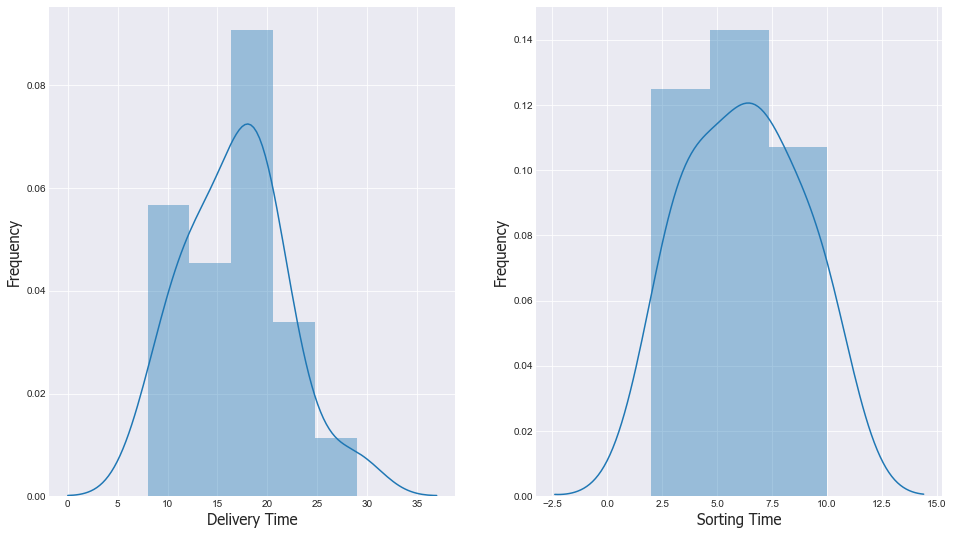

In [6]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
sns.distplot(df['Delivery Time'])
plt.xlabel('Delivery Time',  fontdict={'fontname':'Tahoma', 'fontsize':15})
plt.ylabel('Frequency',  fontdict={'fontname':'Tahoma', 'fontsize':15})


plt.subplot(1,2,2)
sns.distplot(df['Sorting Time'])
plt.xlabel('Sorting Time',  fontdict={'fontname':'Tahoma', 'fontsize':15})
plt.ylabel('Frequency',  fontdict={'fontname':'Tahoma', 'fontsize':15})



### Inference from the above distributions

We can observe that the frequency distribution of the delivery time is somewhat

similar to that of a normal distribution,

there are few entries with 5 > and 30 <

Similar inferences can be made for the Sorting time it is also distributed in a normal distributions 

### Calculating the corelation between delivery and sorting time

In [7]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


We can see that the corelation coefficient is positive and above 0 and closer to 1 

if we plot a versis graph of the two parameters
we can get a sense of the numbers we got in the corelation coefficient 

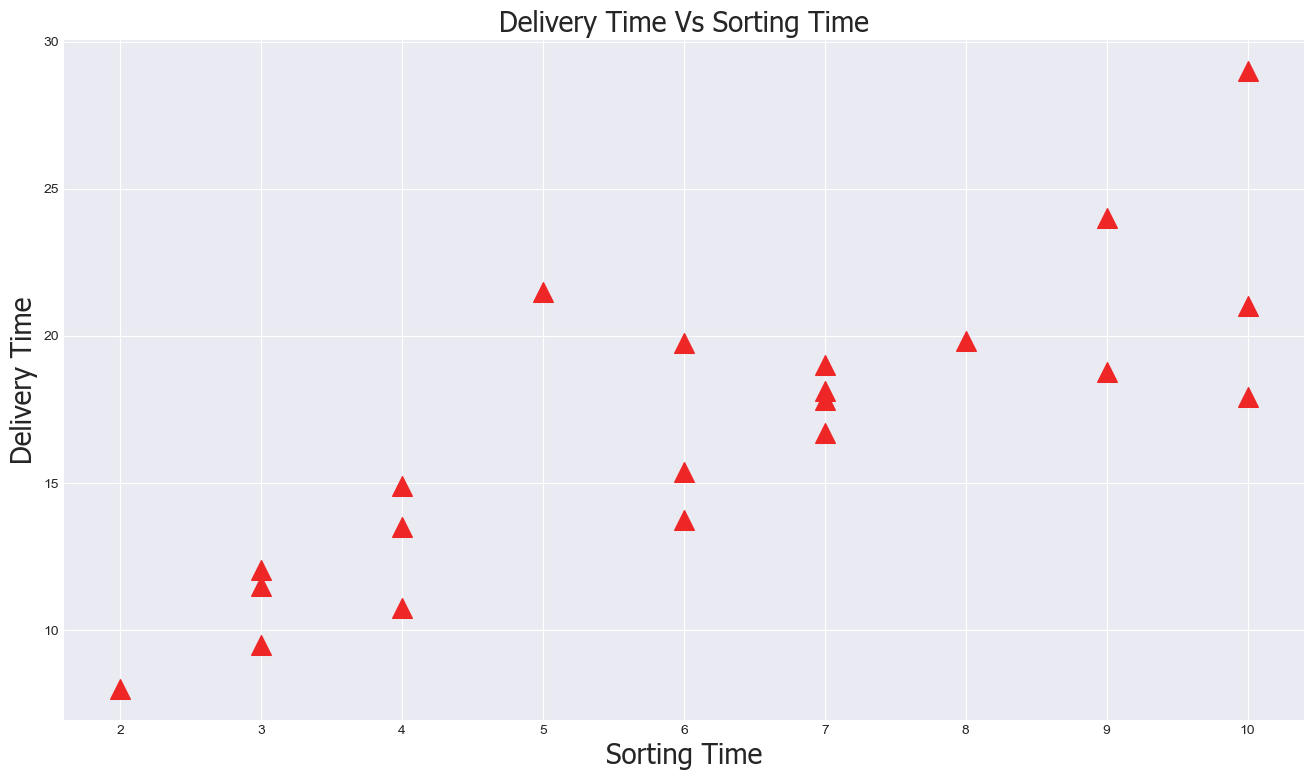

In [8]:
plt.figure(figsize=(16,9), dpi=100)

plt.scatter(df['Sorting Time'], df['Delivery Time'], color = '#ef2626', marker='^',s = 200)
plt.xlabel('Sorting Time',  fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.ylabel('Delivery Time' ,  fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.title('Delivery Time Vs Sorting Time', fontdict={'fontname':'Tahoma', 'fontsize':20})

plt.show()

### Building the Model

In [11]:
import statsmodels.formula.api as smf

'''The formula notation has two parts, where the name left to the 
tilde(~) indicates the response variable and the variable name to the right of the tilde is the predictor.'''

x = df['Delivery Time']
y = df['Sorting Time']

model = smf.ols(formula = 'x~y', data= df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           3.98e-06
Time:                        15:35:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
y              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.params

Intercept    6.582734
y            1.649020
dtype: float64

## The R-Squared value is 0.68 which means that 68% of the point pass through the regression line

## lets visualize it

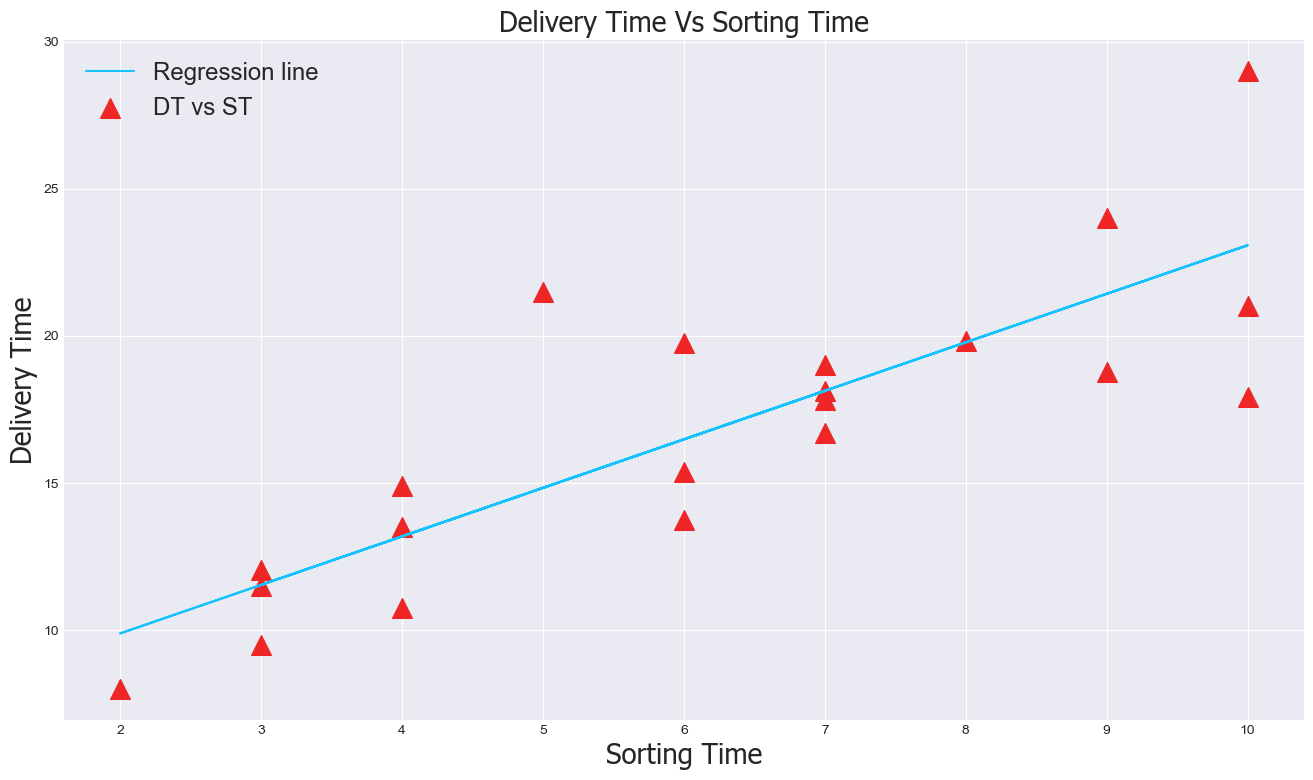

In [17]:
plt.figure(figsize=(16,9), dpi=100)


# Equation of the regression Line
x = df['Sorting Time']
#y2 = mx +c
y2  = 1.649020*x + 6.582734

plt.scatter(df['Sorting Time'], df['Delivery Time'], color = '#ef2626', marker='^',s = 200, label = 'DT vs ST')
plt.plot(df['Sorting Time'], y2 , color = '#16c3fc',label = 'Regression line')
plt.xlabel('Sorting Time',  fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.ylabel('Delivery Time' ,  fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.title('Delivery Time Vs Sorting Time', fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.legend(fontsize = 'xx-large')
plt.show()

## Lets check weather the data is normally distributed around the regression line

### we plot the residual plots

### QQplot

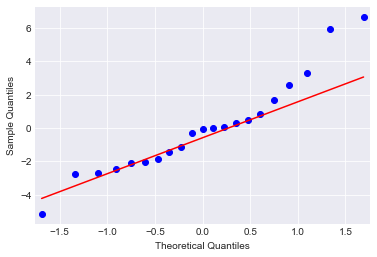

In [20]:
import statsmodels.api  as sm
qqplot = sm.qqplot(model.resid, line = 'q')

The points are distributed normally but the [points on the higher side are way to high so need to worked on]

In [22]:
list(np.where(model.resid>4))

[array([ 4, 20], dtype=int64)]

For further investigation we plot the cook distance and remove the outliers

<ipython-input-27-384b9fdbda88>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(df)), np.round(c, 3))


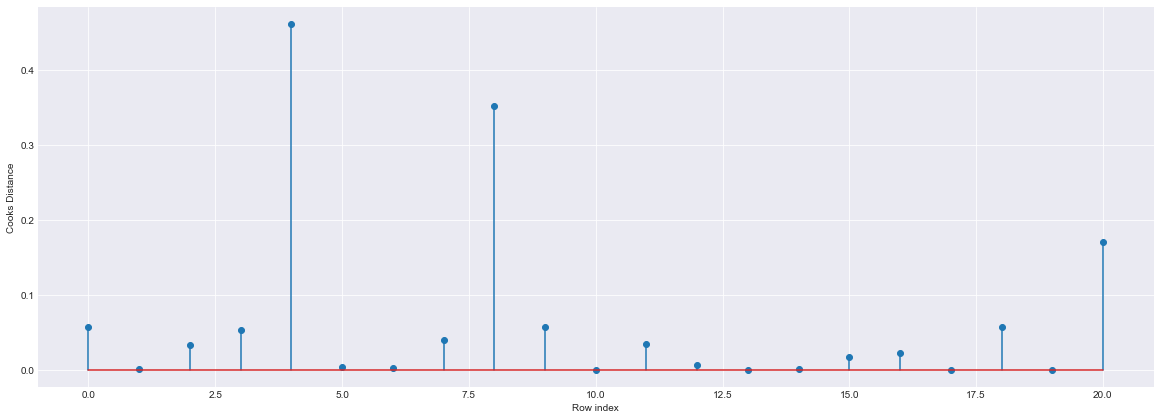

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance


#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
len(df)

21

In [30]:
np.argmax(c)

4

In [31]:
np.max(c)

0.4620530412650319

we find that the 4 index has the highest value which is of 0.46205 

which is an outlier

we further investigate using leverage plot

<Figure size 1000x300 with 0 Axes>

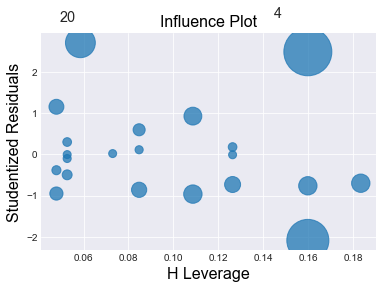

In [36]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize=(10,3), dpi=100)
influence_plot(model)
plt.show()

In [33]:
k = df.shape[1]
n = df.shape[0]

leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.42857142857142855

In [35]:
df.shape

(21, 2)

the above plot it is evident that 4 and 20 are hig leverage points

so we remove them

In [39]:
df[df.index.isin([20,4])]

,Delivery Time,Sorting Time
4,29.0,10
20,21.5,5


In [54]:
new_df = df.drop(df.index[[4,20]], axis = 0).reset_index()
new_df

,index,Delivery Time,Sorting Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6
5,6,19.00,7
6,7,9.50,3
7,8,17.90,10
8,9,18.75,9
9,10,19.83,8


In [55]:
new_df.drop(columns='index', inplace=True)

In [56]:
new_df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,17.90,10
8,18.75,9
9,19.83,8


## now building the model

In [91]:
import statsmodels.formula.api as smf
x2 = new_df['Delivery Time']
y2 = new_df['Sorting Time']
final_model = smf.ols('x2~y2', data = new_df).fit()


In [92]:
final_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x2   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     59.27
Date:                Sat, 05 Dec 2020   Prob (F-statistic):           6.13e-07
Time:                        18:00:45   Log-Likelihood:                -39.784
No. Observations:                  19   AIC:                             83.57
Df Residuals:                      17   BIC:                             85.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7970      1.275      5.332      0.000       4.107       9.487
y2             1.5041      0.195      7.699      0.000       1.092       1.916
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.231
Skew:                           0.211   Prob(JB):                        0.891
Kurtosis:                       2.661   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### r squared value is improved

now we pridict values

In [93]:
new_df.describe()

,Delivery Time,Sorting Time
count,19.000000,19.000000
mean,15.900526,6.052632
std,4.273901,2.504966
min,8.000000,2.000000
25%,12.765000,4.000000
50%,16.680000,6.000000
75%,18.875000,7.500000
max,24.000000,10.000000


In [94]:
new_data = [4,5,6,8,12,6,9,22]
new_data

[4, 5, 6, 8, 12, 6, 9, 22]

In [96]:
data_pred=pd.DataFrame(new_data,columns=['Sorting Time'])
final_model.predict(data_pred)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Number of rows mismatch between data argument and y2 (8 versus 19)
    x2~y2
       ^^